<a href="https://colab.research.google.com/github/ErikMayerPSU/AuroraNSL_2024/blob/main/Code/viewline/viewline_test_2025_0307_1530.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

View Lines

Based on binary_classification_2024_0627_a0935, https://github.com/ErikMayerPSU/AuroraNSL_2024/blob/main/Code/binary_classification_development/binary_classification_2024_0627_a0935.ipynb

Updates:
2/13/2025

*   Switched visibility threshold  calculation to method 2, see: https://colab.research.google.com/drive/1cu7tK7qvEiXJkVui9OLyFi-gpI4__IEH#scrollTo=Y1RQThwg5nop
*   Reversed plot order of visibility threshold

*   Fixed the method of find EB and VL to matche method 2 of finding the VT
*   Added temporary if statement to attempt to remove outliars in the VL





In [86]:
import logging; logging.basicConfig(level=logging.INFO)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd

import numpy as np

plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1

Read data from St Patrick's Day Eflux (OP-13 output) file on GitHub (see File_reading_2024_0623_a0607.ipynb)

In [87]:
# OP-13 data

df_eflux = pd.read_csv(r"https://raw.githubusercontent.com/ErikMayerPSU/AuroraNSL_2024/main/data/St%20patrick's%20day%202015/Eflux/20150318_0200UT_Eflux_e%2Call.txt", header=None, skiprows=1, nrows=7680, sep='\s+', on_bad_lines='skip')

# Define new headers
eflux_headers = ["MLT", "ML", "[mW m^-2]"]

# Set the column headers
df_eflux.columns = eflux_headers

#add column for visibility threshold (VT) T/F
df_eflux["VT"]= 0

#Set VT to 1 or 0 based on aurora visibility threshold of 1 mW m^-2
df_eflux.loc[df_eflux["[mW m^-2]"]>=1, "VT"] = 1

df_eflux

,MLT,ML,[mW m^-2],VT
0,0.00,50.0,0.009205,0
1,0.00,50.5,0.009303,0
2,0.00,51.0,0.005775,0
3,0.00,51.5,0.020590,0
4,0.00,52.0,0.000387,0
...,...,...,...,...
7675,23.75,87.5,0.023140,0
7676,23.75,88.0,0.022190,0
7677,23.75,88.5,0.023080,0
7678,23.75,89.0,0.016270,0



## **Add viewline column**

In [88]:
#add a column for the equatorial boundry (EB) and viewline (VL)
df_eflux["EB"] = 0 #initialize as 0 not "0"
df_eflux["VL"] = 0

last_j = 0 #initialize last j

#apply viewline equation to OP-13 data
for i in range(len(df_eflux["MLT"])):

  #find first instance of visibility threshold being 1 for each MLT value 0-24
  selected_rows = df_eflux.loc[(df_eflux["MLT"] == i/4) & (df_eflux["VT"] >= 1)]

  # Check that there is an instance of the VT being 1 in this value of MLT
  if not selected_rows.empty:
    j = selected_rows.index[0]

    #2/13/25 added if statement to attempt to remove outliars
    #can be removed
    if (df_eflux.loc[last_j,"ML"]-df_eflux.loc[j,"ML"] < 1) & (df_eflux.loc[last_j,"ML"]-df_eflux.loc[j,"ML"] > -1):

    # Set the EB column to show the first instance of visibility threshold being
    # 1 for each MLT value 0-24
      df_eflux.loc[j,"EB"] = 1
    # Set the viewline based on the EB VL equation
      df_eflux.loc[j-8,"VL"] = 1

    last_j = j

df_eflux

,MLT,ML,[mW m^-2],VT,EB,VL
0,0.00,50.0,0.009205,0,0,0
1,0.00,50.5,0.009303,0,0,0
2,0.00,51.0,0.005775,0,0,0
3,0.00,51.5,0.020590,0,0,0
4,0.00,52.0,0.000387,0,0,0
...,...,...,...,...,...,...
7675,23.75,87.5,0.023140,0,0,0
7676,23.75,88.0,0.022190,0,0,0
7677,23.75,88.5,0.023080,0,0,0
7678,23.75,89.0,0.016270,0,0,0


Plot the labelled data

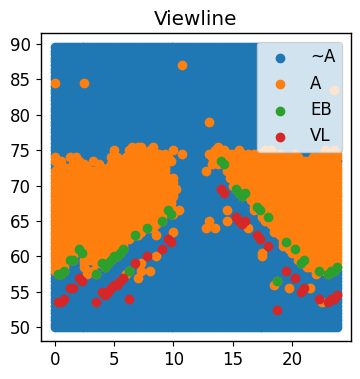

In [89]:
# Data for A from eflux file on GitHub
#print("Data for A:")

#print(df_eflux[["MLT","ML"]]) # Added E.M.
#print(df_eflux[["VT"]]) # Added E.M

#print("Data for EB:")
#print(df_eflux[["EB"]])

#print("Data for VL:")
#print(df_eflux[["VL"]])

plt.figure(figsize=(4,4))

#reverse plot order to better see A points
plt.scatter(df_eflux["MLT"][np.logical_not(df_eflux['VT'].astype(bool))], df_eflux["ML"][np.logical_not(df_eflux['VT'].astype(bool))], label='~A')
plt.scatter(df_eflux["MLT"][df_eflux['VT'].astype(bool)], df_eflux["ML"][df_eflux['VT'].astype(bool)], label='A')

#Plot EB
plt.scatter(df_eflux["MLT"][df_eflux['EB'].astype(bool)], df_eflux["ML"][df_eflux['EB'].astype(bool)], label='EB')
#Plot VL
plt.scatter(df_eflux["MLT"][df_eflux["VL"].astype(bool)], df_eflux["ML"][df_eflux["VL"].astype(bool)], label='VL')

plt.title("Viewline")
plt.legend()
plt.show()

In [90]:
array_eflux = df_eflux.to_numpy()
array_eflux

array([[0.000e+00, 5.000e+01, 9.205e-03, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 5.050e+01, 9.303e-03, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 5.100e+01, 5.775e-03, 0.000e+00, 0.000e+00, 0.000e+00],
       ...,
       [2.375e+01, 8.850e+01, 2.308e-02, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.375e+01, 8.900e+01, 1.627e-02, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.375e+01, 8.950e+01, 2.794e-02, 0.000e+00, 0.000e+00, 0.000e+00]])

In [91]:
array_VL = array_eflux[0:7680,5:6]
array_VL

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [92]:
for i in range(96):
    array_temp = array_VL[(i*80):((i+1)*80),0:1]
    print(i*80)
    print((i+1)*80)
    try:
        # Find the index of the first occurrence of 1 in array_temp
        idx = np.where(array_temp == 1)[0][0]  # Use np.where to find the index
        print(idx)
        array_VL[(i*80)+idx:((i+1)*80),0:1] = 1
        #for j in range(idx):
            #array_VL[i * 80 + (80 - j)] = 1 #Fixed index out of range error
            #print(i * 80 + (80 - j))
    except IndexError: #Changed to IndexError since np.where returns an empty array if the value is not found which leads to an IndexError
        print("no")

array_VL

0
80
no
80
160
7
160
240
7
240
320
8
320
400
no
400
480
11
480
560
11
560
640
no
640
720
14
720
800
13
800
880
no
880
960
no
960
1040
no
1040
1120
no
1120
1200
7
1200
1280
no
1280
1360
10
1360
1440
9
1440
1520
10
1520
1600
11
1600
1680
12
1680
1760
12
1760
1840
13
1840
1920
14
1920
2000
no
2000
2080
8
2080
2160
no
2160
2240
18
2240
2320
no
2320
2400
no
2400
2480
no
2480
2560
20
2560
2640
no
2640
2720
no
2720
2800
no
2800
2880
no
2880
2960
22
2960
3040
no
3040
3120
25
3120
3200
24
3200
3280
no
3280
3360
no
3360
3440
no
3440
3520
no
3520
3600
no
3600
3680
no
3680
3760
no
3760
3840
no
3840
3920
no
3920
4000
no
4000
4080
no
4080
4160
no
4160
4240
no
4240
4320
no
4320
4400
no
4400
4480
no
4480
4560
39
4560
4640
38
4640
4720
no
4720
4800
no
4800
4880
no
4880
4960
31
4960
5040
30
5040
5120
29
5120
5200
30
5200
5280
no
5280
5360
no
5360
5440
no
5440
5520
26
5520
5600
25
5600
5680
no
5680
5760
no
5760
5840
23
5840
5920
no
5920
6000
no
6000
6080
5
6080
6160
no
6160
6240
no
6240
6320
16
6320
6400

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [93]:
df_eflux['VIS'] = pd.DataFrame(array_VL, columns=['VIS'])
df_eflux

,MLT,ML,[mW m^-2],VT,EB,VL,VIS
0,0.00,50.0,0.009205,0,0,0,0.0
1,0.00,50.5,0.009303,0,0,0,0.0
2,0.00,51.0,0.005775,0,0,0,0.0
3,0.00,51.5,0.020590,0,0,0,0.0
4,0.00,52.0,0.000387,0,0,0,0.0
...,...,...,...,...,...,...,...
7675,23.75,87.5,0.023140,0,0,0,1.0
7676,23.75,88.0,0.022190,0,0,0,1.0
7677,23.75,88.5,0.023080,0,0,0,1.0
7678,23.75,89.0,0.016270,0,0,0,1.0


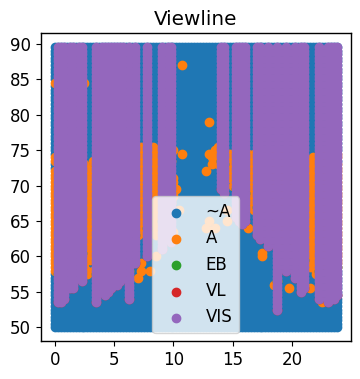

In [94]:
plt.figure(figsize=(4,4))

#reverse plot order to better see A points
plt.scatter(df_eflux["MLT"][np.logical_not(df_eflux['VT'].astype(bool))], df_eflux["ML"][np.logical_not(df_eflux['VT'].astype(bool))], label='~A')
plt.scatter(df_eflux["MLT"][df_eflux['VT'].astype(bool)], df_eflux["ML"][df_eflux['VT'].astype(bool)], label='A')

#Plot EB
plt.scatter(df_eflux["MLT"][df_eflux['EB'].astype(bool)], df_eflux["ML"][df_eflux['EB'].astype(bool)], label='EB')
#Plot VL
plt.scatter(df_eflux["MLT"][df_eflux["VL"].astype(bool)], df_eflux["ML"][df_eflux["VL"].astype(bool)], label='VL')

#Plot VIS
plt.scatter(df_eflux["MLT"][df_eflux["VIS"].astype(bool)], df_eflux["ML"][df_eflux["VIS"].astype(bool)], label='VIS')

plt.title("Viewline")
plt.legend()
plt.show()